**[LeetCode Link](https://leetcode-cn.com/problems/first-missing-positive/solution/que-shi-de-di-yi-ge-zheng-shu-by-leetcode/)**

## Bitmap
### 数据预处理
* 首先我们可以不考虑负数和零，因为不需要考虑。同样可以不考虑大于 n 的数字，因为首次缺失的正数一定小于或等于 n + 1 。
* 缺失的正数为 n + 1 的情况会单独考虑。
* 为了不考虑这些数，又要保证时间复杂度为O(N)，因此不能将这些元素弹出。我们可以将这些数用 1 替换。
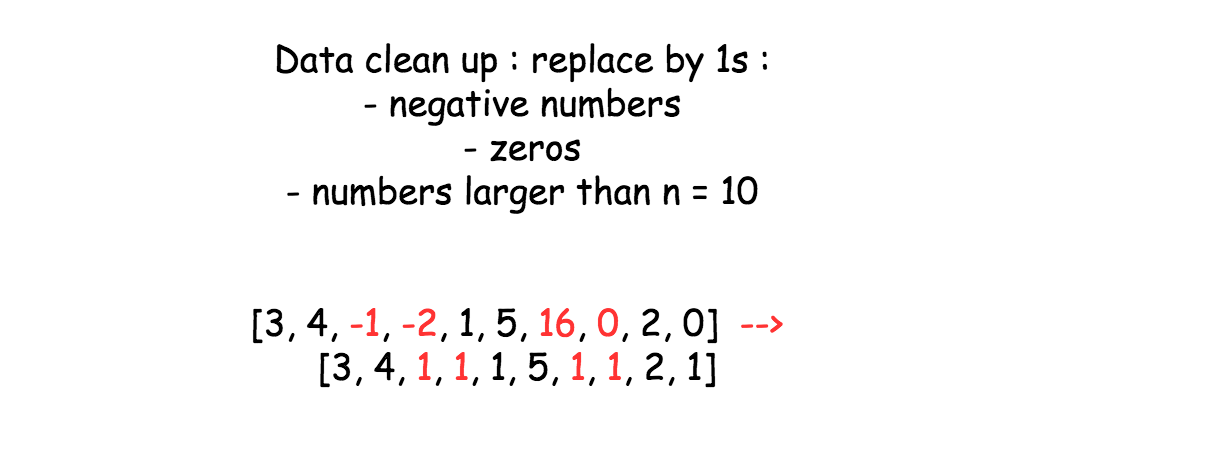

### ***使用索引作为哈希键*** 以及 ***元素的符号作为哈希值*** 来实现是否存在的检测。
例如，nums[2] 元素的负号意味着数字 2 出现在 nums 中。nums[3]元素的正号表示 3 没有出现在 nums 中。

### 算法
* 检查 1 是否存在于数组中。如果没有，则已经完成，1 即为答案。
* 如果 nums = [1]，答案即为 2 。
* 将负数，零，和大于 n 的数替换为 1 。
* 遍历数组。当读到数字 a 时，替换第 a 个元素的符号。注意重复元素：只能改变一次符号。由于没有下标 n ，使用下标 0 的元素保存是否存在数字 n。
* 再次遍历数组。返回第一个正数元素的下标。
* 如果 nums[0] > 0，则返回 n 。
* 如果之前的步骤中没有发现 nums 中有正数元素，则返回n + 1。

In [1]:
class Solution:
    def firstMissingPositive(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        n = len(nums)
        
        # 基本情况
        if 1 not in nums:
            return 1
        
        # nums = [1]
        if n == 1:
            return 2
        
        # 用 1 替换负数，0，
        # 和大于 n 的数
        # 在转换以后，nums 只会包含
        # 正数
        for i in range(n):
            if nums[i] <= 0 or nums[i] > n:
                nums[i] = 1
        
        # 使用索引和数字符号作为检查器
        # 例如，如果 nums[1] 是负数表示在数组中出现了数字 `1`
        # 如果 nums[2] 是正数 表示数字 2 没有出现
        for i in range(n): 
            a = abs(nums[i])
            # 如果发现了一个数字 a - 改变第 a 个元素的符号
            # 注意重复元素只需操作一次
            if a == n:
                nums[0] = - abs(nums[0])
            else:
                nums[a] = - abs(nums[a])
            
        # 现在第一个正数的下标
        # 就是第一个缺失的数
        for i in range(1, n):
            if nums[i] > 0:
                return i
        
        if nums[0] > 0:
            return n
            
        return n + 1

In [4]:
solve = Solution()
nums = [3,4,-1,1]
solve.firstMissingPositive(nums)

2